# Test impulse size for SCC

Are we running into numerical issues if use very small impulse sizes for the marginal impulse?

Doesn't look like it.

* TODO Update the project env to use tagged versions of models
* TODO Add FUND, DICE2010 and RICE2010 test

In [1]:
using Mimi, DataFrames, VegaLite

In [2]:
using MimiFUND, MimiDICE2010, MimiPAGE2009

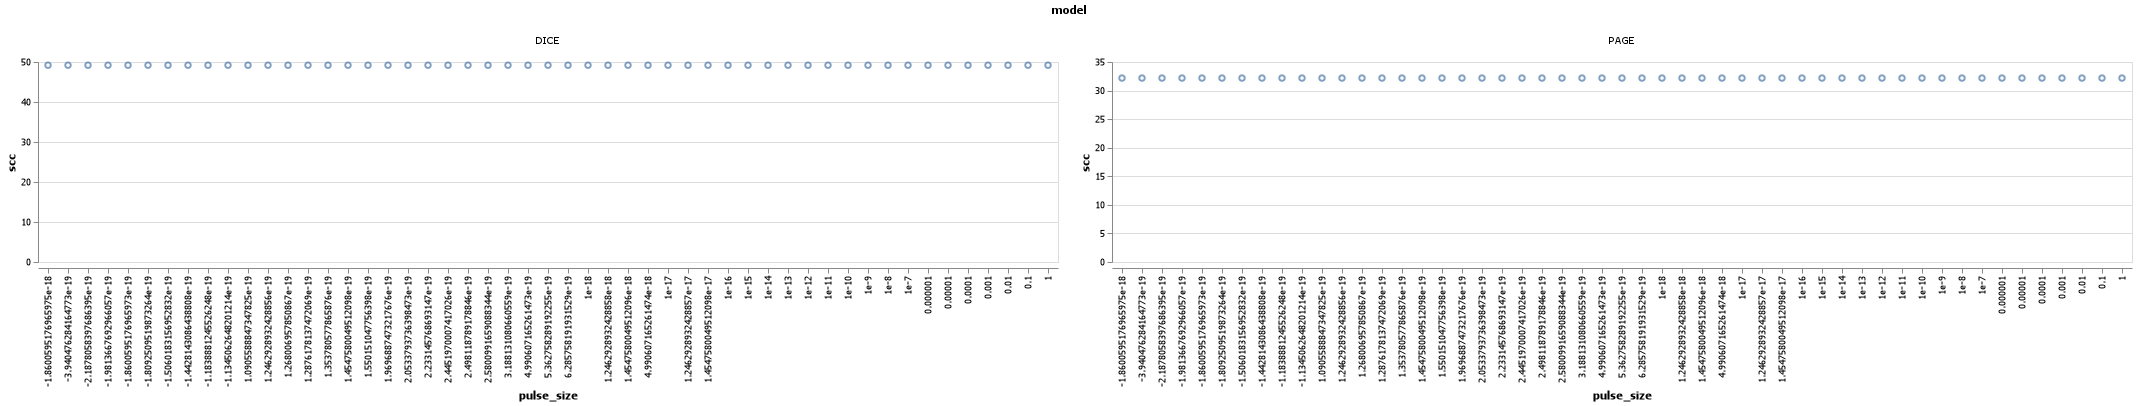

In [3]:
df_output = DataFrame(model=String[], pulse_size=Float64[], scc=Float64[])

m_fund = MimiFUND.get_model();
m_dice = MimiDICE2010.get_model();
m_page = MimiPAGE2009.get_model();

for pulse_size in 1 ./ 10 .^ (0:50)
#     scc_fund = MimiFUND.compute_scc(m_fund, year=2020, prtp=0.03, eta=0., pulse_size=pulse_size)
#     push!(df_output, ("FUND", pulse_size, scc_fund))
    
    scc_dice = MimiDICE2010.compute_scc(m_dice, year=2025, prtp=0.03, eta=0.)
    push!(df_output, ("DICE", pulse_size, scc_dice))
    
    scc_page = MimiPAGE2009.compute_scc(m_page, year=2020, prtp=0.03, eta=0.)
    push!(df_output, ("PAGE", pulse_size, scc_page))
end

df_output |> @vlplot(:point, x="pulse_size:o", y=:scc, column=:model, resolve={scale={y=:independent}})

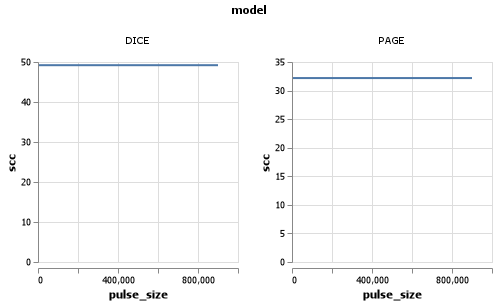

In [4]:
df_output = DataFrame(model=String[], pulse_size=Float64[], scc=Float64[])

m_fund = MimiFUND.get_model();
m_dice = MimiDICE2010.get_model();
m_page = MimiPAGE2009.get_model();

for pulse_size in 1:100_000:1_000_000
#     scc_fund = MimiFUND.compute_scc(m_fund, year=2020, prtp=0.03, eta=0., pulse_size=pulse_size)
#     push!(df_output, ("FUND", pulse_size, scc_fund))
    
    scc_dice = MimiDICE2010.compute_scc(m_dice, year=2025, prtp=0.03, eta=0.)
    push!(df_output, ("DICE", pulse_size, scc_dice))
    
    scc_page = MimiPAGE2009.compute_scc(m_page, year=2020, prtp=0.03, eta=0.)
    push!(df_output, ("PAGE", pulse_size, scc_page))
end

df_output |> @vlplot(:line, x=:pulse_size, y=:scc, column=:model, resolve={scale={y=:independent}})